# Why it's interesting to look at Quantum Kernels

In [8]:
from qmlab.data_generation import generate_random_data
from qmlab.plotting import plot_2d_data_with_train_test_split, plot_decision_boundaries
from sklearn import metrics

random_state = 12345

In [ ]:
X_train, y_train, X_test, y_test = generate_random_data(
    feature_dimension=2,
    training_examples_per_class=20,
    test_examples_per_class=5,
    delta=0.3,
    random_state=random_state,
)

plot_2d_data_with_train_test_split(X_train, y_train, X_test, y_test, separate_plots=True)

In [2]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf", random_state=random_state)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.3

$$ \tt{accuracy}(\mathcal{\hat{Y}}, \mathcal{Y}) = \frac{1}{m} \sum_{i=1}^m \delta_{\hat{y}_i\,y_i} \qquad 
\mathcal{\hat{Y}}, \mathcal{Y} \in \mathbb{R}^d$$ 

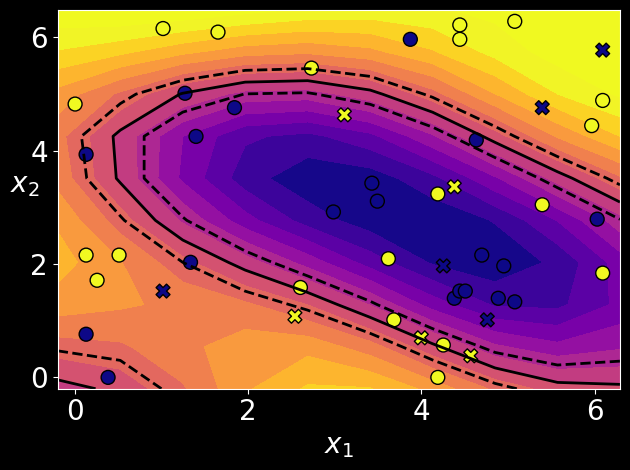

In [3]:
plot_decision_boundaries(svm, X_train, y_train, X_test, y_test)

In [4]:
from qmlab.kernel.iqp_kernel import IQPKernelClassifier

qsvm = IQPKernelClassifier(jit=True)
qsvm.fit(X_train, y_train)

y_pred = qsvm.predict(X_test)
metrics.accuracy_score(y_test, y_pred) 

0.7

In [5]:
X_train, y_train, X_test, y_test = generate_random_data(
    feature_dimension=4,
    training_examples_per_class=20,
    test_examples_per_class=5,
    delta=0.3,
    random_state=random_state,
)
X_train.shape

(40, 4)

In [6]:
svm = SVC(kernel="rbf", random_state=random_state)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.4

In [7]:
qsvm.fit(X_train, y_train)
qsvm.score(X_test, y_test)

0.5